In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("D:/python_github/SampleSuperstore.csv", encoding="ISO-8859-1")
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [3]:
print(df.shape)
print(df.info())

(9994, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 1

In [4]:
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')
df['Ship Date'] = pd.to_datetime(df['Ship Date'], errors='coerce')

df['Shipping_Days'] = (df['Ship Date'] - df['Order Date']).dt.days

df['Profit_Margin'] = (df['Profit']/df['Sales'])*100

df['Year'] = df['Order Date'].dt.year
df['Month'] = df['Order Date'].dt.month_name()

In [5]:
# Sales per region, category, year
sales_summary = df.groupby(['Region', 'Category', 'Year'])['Sales'].sum().reset_index()
print(sales_summary.head())

# Cumulative sales
df['Cumulative_Sales'] = df.groupby('Region')['Sales'].cumsum()

# Pivot: year vs. category
pivot_sales = df.pivot_table(values='Sales', index='Year', columns='Category', aggfunc='sum')
print(pivot_sales)

    Region         Category  Year       Sales
0  Central        Furniture  2014  32909.6636
1  Central        Furniture  2015  35592.0470
2  Central        Furniture  2016  50773.1820
3  Central        Furniture  2017  44522.2712
4  Central  Office Supplies  2014  37001.6910
Category    Furniture  Office Supplies  Technology
Year                                              
2014      157192.8531       151776.412  175278.233
2015      170518.2370       137233.463  162780.809
2016      198901.4360       183939.982  226364.180
2017      215387.2692       246097.175  271730.811


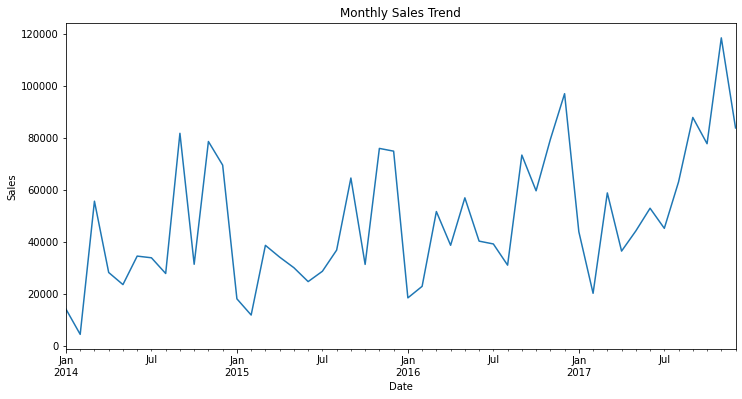

In [6]:
# Monthly sales trend
plt.figure(figsize=(12,6))
monthly_sales = df.groupby(df['Order Date'].dt.to_period("M"))['Sales'].sum()
monthly_sales.plot()
plt.title("Monthly Sales Trend")
plt.ylabel("Sales")
plt.xlabel("Date")
plt.show()

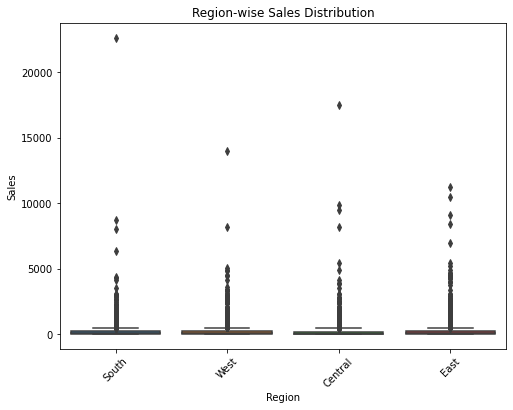

In [7]:
# Region-wise sales distribution
plt.figure(figsize=(8,6))
sns.boxplot(x='Region', y='Sales', data=df)
plt.title("Region-wise Sales Distribution")
plt.xticks(rotation=45)
plt.show()

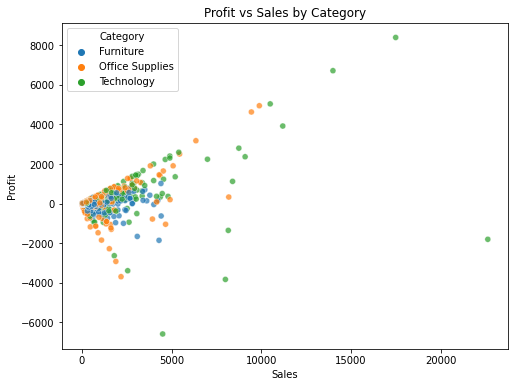

In [8]:
# Category-wise Profit vs Sales
plt.figure(figsize=(8,6))
sns.scatterplot(x='Sales', y='Profit', hue='Category', data=df, alpha=0.7)
plt.title("Profit vs Sales by Category")
plt.show()

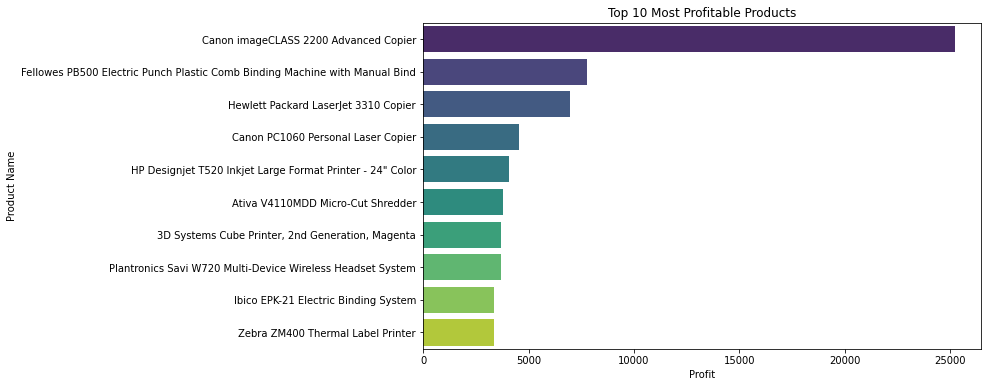

In [9]:
# Top 10 most profitable products
top_products = df.groupby('Product Name')['Profit'].sum().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10,6))
sns.barplot(y='Product Name', x='Profit', data=top_products.head(10), palette='viridis')
plt.title("Top 10 Most Profitable Products")
plt.xlabel("Profit")
plt.ylabel("Product Name")
plt.show()

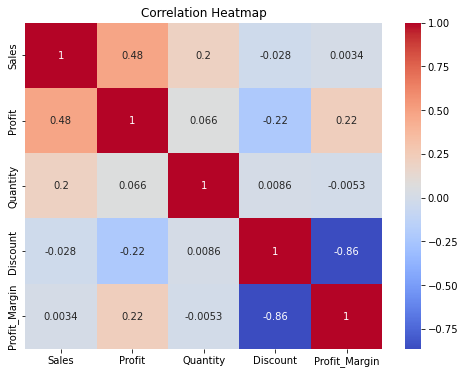

In [10]:
# Correlation Heatmap

plt.figure(figsize=(8,6))
sns.heatmap(df[['Sales','Profit','Quantity','Discount','Profit_Margin']].corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()